In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
from pathlib import Path
from PIL import Image
import glob

path = "/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data"

filepaths = list(Path(path).glob('*/*.jpg'))
print(filepaths)

banana = glob.glob(path+"/banana" + '/*')
grape = glob.glob(path+"/grape"+'/*')
kiwi = glob.glob(path+"/kiwi"+'/*')
mango = glob.glob(path+"/mango"+'/*')
orange = glob.glob(path+"/orange"+'/*')

[PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/233.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/238.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/127.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/165.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/1132.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/230.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/1137.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/20.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/1151.jpg'), PosixPath('/content/drive/MyDrive/Colab Notebooks/ml_image/new_category_data/banana/219.jpg'), PosixPath('/content/drive/MyDrive/Colab Noteboo

총 15개의 이미지 


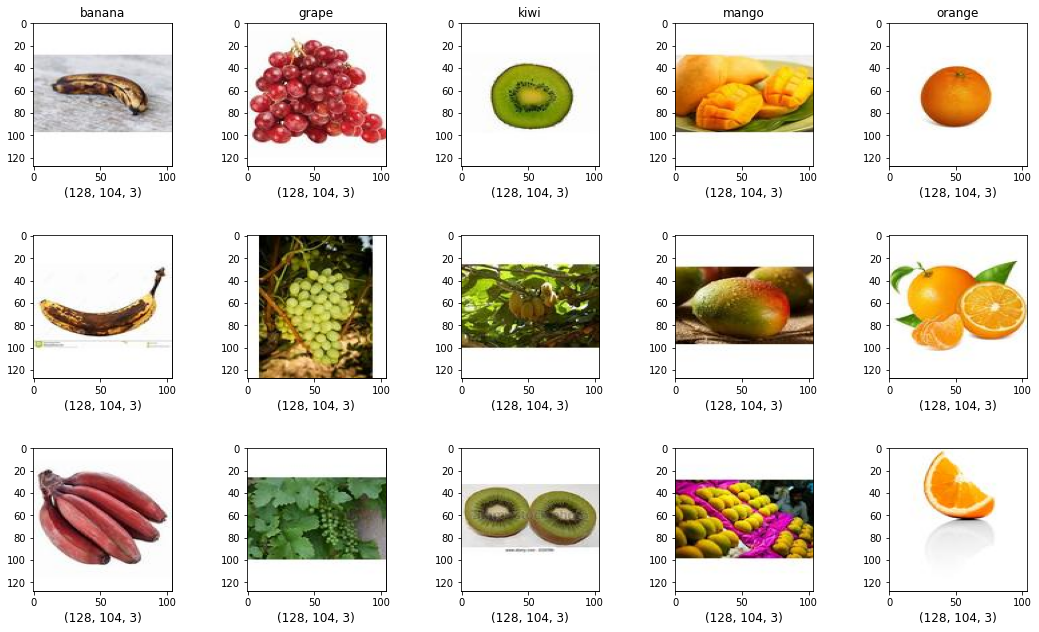

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

import random
img_arrs = []
img_num = range(0,500)

for i in random.sample(img_num,3):

    img_arrs.append(read_img(banana[i]))
    img_arrs.append(read_img(grape[i]))
    img_arrs.append(read_img(kiwi[i]))
    img_arrs.append(read_img(mango[i]))
    img_arrs.append(read_img(orange[i]))

print("총 {}개의 이미지 ".format(len(img_arrs)))

rows = 3
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

for num in range(1, rows*columns+1):
    
    fig.add_subplot(rows, columns, num)
    idx = num - 1
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout()

cols = ['banana', 'grape', 'kiwi', 'mango', 'orange']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    data = pd.concat([filepath, labels], axis=1)

    data = data.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return data

data = proc_img(filepaths)

print(f'Number of pictures: {data.shape[0]}\n')
print(f'Number of different labels: {len(data.Label.unique())}\n')
print(f'Labels: {data.Label.unique()}')

Number of pictures: 5051

Number of different labels: 5

Labels: ['mango' 'orange' 'banana' 'grape' 'kiwi']


In [ ]:
from sklearn.utils import shuffle

data = shuffle(data, random_state=42)
data.reset_index(inplace=True, drop=True)

batch_size = 10

print(data)

                                               Filepath   Label
0     /content/drive/MyDrive/Colab Notebooks/ml_imag...  orange
1     /content/drive/MyDrive/Colab Notebooks/ml_imag...   grape
2     /content/drive/MyDrive/Colab Notebooks/ml_imag...   grape
3     /content/drive/MyDrive/Colab Notebooks/ml_imag...   mango
4     /content/drive/MyDrive/Colab Notebooks/ml_imag...    kiwi
...                                                 ...     ...
5046  /content/drive/MyDrive/Colab Notebooks/ml_imag...   grape
5047  /content/drive/MyDrive/Colab Notebooks/ml_imag...   mango
5048  /content/drive/MyDrive/Colab Notebooks/ml_imag...   mango
5049  /content/drive/MyDrive/Colab Notebooks/ml_imag...   grape
5050  /content/drive/MyDrive/Colab Notebooks/ml_imag...   mango

[5051 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(data, test_size=0.2,random_state=0)
train_df.shape,test_df.shape

((4040, 2), (1011, 2))

In [ ]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    directory = path,
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)

val_gen = train_datagen.flow_from_directory(
    directory = path,
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation'
)

Found 4042 images belonging to 5 classes.
Found 1009 images belonging to 5 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
history = cnn.fit(
    x = train_gen,
    validation_data = val_gen,
    epochs = 12
)

Epoch 1/12
127/127 [==============================] - 753s 6s/step - loss: 211.5168 - accuracy: 0.2833 - val_loss: 1.6166 - val_accuracy: 0.2428
Epoch 2/12
127/127 [==============================] - 335s 3s/step - loss: 1.3754 - accuracy: 0.4431 - val_loss: 1.5757 - val_accuracy: 0.3865
Epoch 3/12
127/127 [==============================] - 337s 3s/step - loss: 0.9450 - accuracy: 0.6564 - val_loss: 1.6734 - val_accuracy: 0.4252
Epoch 4/12
127/127 [==============================] - 340s 3s/step - loss: 0.5935 - accuracy: 0.7860 - val_loss: 1.9639 - val_accuracy: 0.4519
Epoch 5/12
127/127 [==============================] - 335s 3s/step - loss: 0.4416 - accuracy: 0.8464 - val_loss: 2.2998 - val_accuracy: 0.4182
Epoch 6/12
127/127 [==============================] - 339s 3s/step - loss: 0.3468 - accuracy: 0.8830 - val_loss: 3.4010 - val_accuracy: 0.4559
Epoch 7/12
127/127 [==============================] - 327s 3s/step - loss: 0.3479 - accuracy: 0.8872 - val_loss: 2.5125 - val_accuracy: 0.40

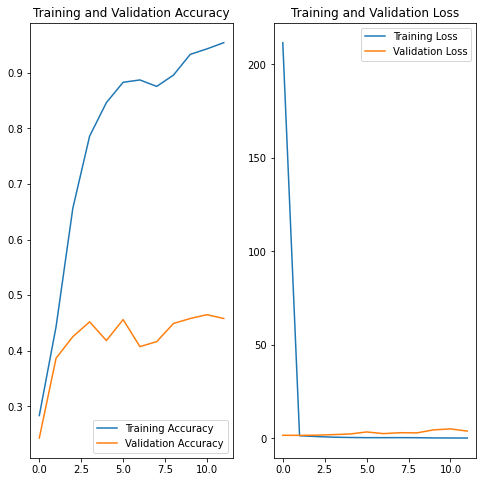

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

{'loss': [1.5744563341140747, 1.115706443786621, 0.6791335940361023, 0.5304428935050964, 0.4174567759037018, 0.31024718284606934, 0.28385359048843384, 0.25411713123321533, 0.2160630226135254, 0.16188476979732513, 0.2125183492898941, 0.2261606752872467, 0.1475079506635666, 0.19574686884880066, 0.14469905197620392, 0.16509287059307098, 0.18295393884181976, 0.15379205346107483, 0.10591096431016922, 0.1507531851530075], 'accuracy': [0.37085601687431335, 0.5507174730300903, 0.7241464853286743, 0.8149430751800537, 0.856259286403656, 0.8849579691886902, 0.9062345623970032, 0.9176150560379028, 0.9307273626327515, 0.947303295135498, 0.936170220375061, 0.939633846282959, 0.9512617588043213, 0.9448292851448059, 0.9549728035926819, 0.9482929110527039, 0.9505195617675781, 0.9562097787857056, 0.9695695042610168, 0.9614052176475525], 'val_loss': [1.5171226263046265, 1.7264560461044312, 2.118256092071533, 2.3916053771972656, 3.201601982116699, 3.4216928482055664, 3.420008420944214, 3.824721574783325, 4.59011173248291, 4.385676383972168, 8.07103443145752, 4.429089069366455, 4.91964054107666, 6.564679145812988, 6.019190311431885, 5.326573848724365, 5.456295013427734, 4.956807613372803, 5.776249408721924, 6.132285118103027], 'val_accuracy': [0.30624380707740784, 0.3706640303134918, 0.3875123858451843, 0.39246779680252075, 0.41030722856521606, 0.39841428399086, 0.3994053602218628, 0.4162537157535553, 0.44301289319992065, 0.4291377663612366, 0.4340931475162506, 0.432110995054245, 0.43805748224258423, 0.4331020712852478, 0.4291377663612366, 0.42814669013023376, 0.4162537157535553, 0.44003963470458984, 0.43904855847358704, 0.45589691400527954]}
train loss= 0.1507531851530075
validation loss= 6.132285118103027

In [ ]:
cnn.save_weights('/content/drive/MyDrive/Colab Notebooks/ml_image/third/final_finallll_weights.h5')
cnn.save('/content/drive/MyDrive/Colab Notebooks/ml_image/third/final_finallll.h5')

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator, test_generator, train_images, val_images, test_images

In [ ]:
from time import perf_counter

models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
}

train_generator, test_generator, train_images, val_images, test_images = create_gen()
print('\n')

def get_model(model):
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


for name, model in models.items():
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)
    m.save_weights('/content/drive/MyDrive/Colab Notebooks/ml_image/third/' + name + '_weight.h5')
    m.save('/content/drive/MyDrive/Colab Notebooks/ml_image/third/' + name + '.h5')

    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 3636 validated image filenames belonging to 5 classes.
Found 404 validated image filenames belonging to 5 classes.
Found 1011 validated image filenames belonging to 5 classes.


29084464/29084464 [==============================] - 0s 0us/step
DenseNet121          trained in 636.12 sec
74836368/74836368 [==============================] - 1s 0us/step
DenseNet201          trained in 1016.1 sec
234545216/234545216 [==============================] - 3s 0us/step
ResNet152V2          trained in 1680.9 sec


In [ ]:
from sklearn.metrics import classification_report,accuracy_score

for name, model in models.items():
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')

models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1], 
                          models[name]['acc'],
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

32/32 [==============================] - 165s 5s/step
**DenseNet121 has a 93.08% accuracy on the test set**
32/32 [==============================] - 245s 8s/step
**DenseNet201 has a 92.58% accuracy on the test set**
32/32 [==============================] - 445s 14s/step
**ResNet152V2 has a 90.21% accuracy on the test set**


,model,val_accuracy,accuracy,Training time (sec)
0,DenseNet121,0.9134,0.9308,636.12
1,DenseNet201,0.9455,0.9258,1016.10
2,ResNet152V2,0.9035,0.9021,1680.90


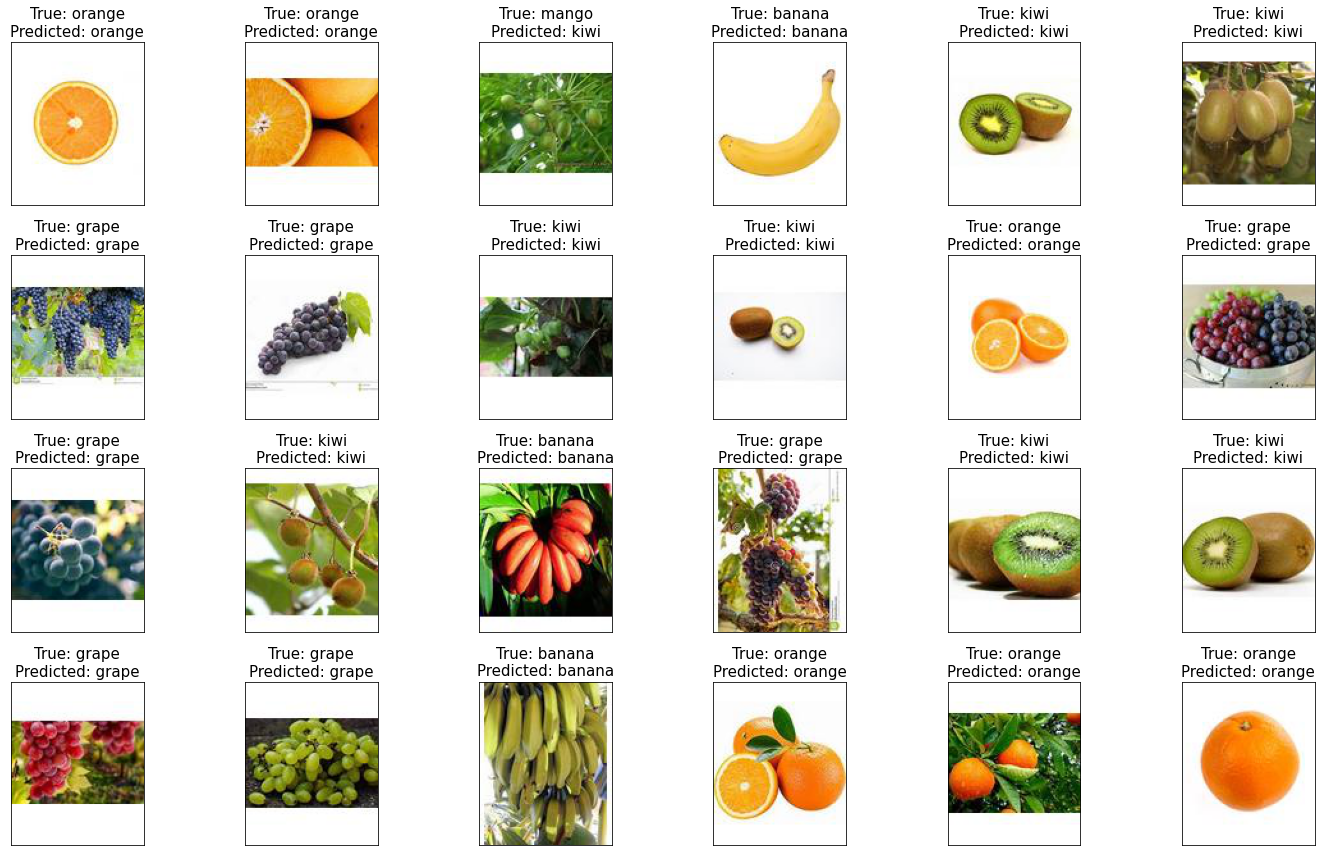

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ml_image/third/DenseNet201.h5', compile=False)
 
export_path = '/content/drive/MyDrive/Colab Notebooks/final'
model.save(export_path, save_format="tf")

In [ ]:
import tensorflow as tf
 
saved_model_dir = '/content/drive/MyDrive/Colab Notebooks/final'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()
open('/content/drive/MyDrive/Colab Notebooks/final/converted_model.tflite', 'wb').write(tflite_model)

73541240